In [29]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [30]:
# import numpy as np     numpy is already imported
# import pandas as pd    pandas is already imported

# import seaborn to visualize data that built on top of matplotlib
import seaborn as sns

# import pipeline to make machine learning pipeline to overcome data leakage problem
from sklearn.pipeline import Pipeline

# import StandardScaler to Column Standardize the data
# many algorithm assumes data to be Standardized
from sklearn.preprocessing import StandardScaler

# train_test_split is used to split the data into train and test set of given data
from sklearn.model_selection import train_test_split

# KFold is used for defining the no.of folds for Cross Validation
from sklearn.model_selection import KFold

# cross_val_score is used to find the score on given model and KFlod
from sklearn.model_selection import cross_val_score

# used for Hyper-parameter
from sklearn.model_selection import GridSearchCV

# classification report show the classification report
# precision, recall, f1-score
from sklearn.metrics import classification_report

# accuracy score is also a metrics to judge the model
# mostly used for Balanced dataset
# not better for Imabalanced dataset
from sklearn.metrics import accuracy_score

# confusion matrix show the comparision between actual label and predicted label of data
# mostly used for Binary classification
from sklearn.metrics import confusion_matrix

# importing different algorithms to train our data and find better model among all algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# KNN is slow algorithm for runtime b'z it doesn't learn anything at the time of fitting the model
# KNN just stores every datapoint and find K Nearest Neighbor and
# among all nearest neighbor whichever has high no.of points that is the label of that query point
# Because it store every datapoint in memory to predict the label in runtime, It is not better for large data
# KNN is less used in industry because it is not good for Low "latency"(time to predict the label of given query point) systems like SearchEngines
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Ensembles generally group more than one model to give better model
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [32]:
train.shape

(891, 12)

In [33]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [35]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [36]:
train.groupby('Survived').size()

Survived
0    549
1    342
dtype: int64

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [38]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<p style="font-family:'Segoe UI';font-size:20px;">There are three columns which has null values<br>
1. Age has 177 null value <br>
2. Cabin has 687 null value <br>
3. Embarked has 2 null value <br>(in total)

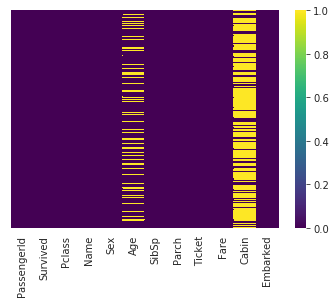

In [39]:
sns.heatmap(train.isnull(),yticklabels=False,cmap='viridis')

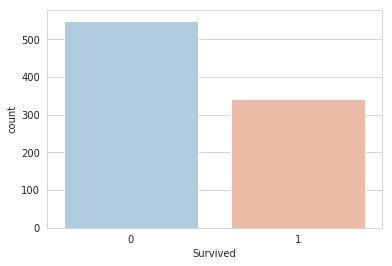

In [40]:
# setting the style of axes(plotting area) as 'whitegrid'.
sns.set_style('whitegrid')

# let's count the #person survived
sns.countplot(x='Survived',data= train, palette='RdBu_r')

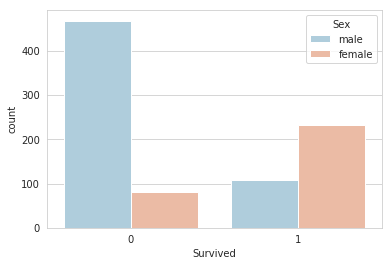

In [41]:
# count # survived person catergorised by 'Sex'
sns.countplot(x='Survived', hue='Sex',data= train, palette='RdBu_r')

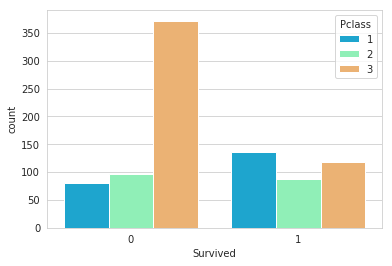

In [42]:
sns.countplot(x='Survived', hue='Pclass',data= train, palette='rainbow')

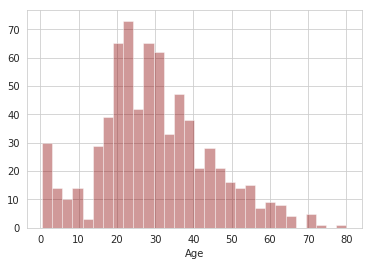

In [43]:
sns.distplot(train['Age'].dropna(),kde=False,bins=30,color='darkred')

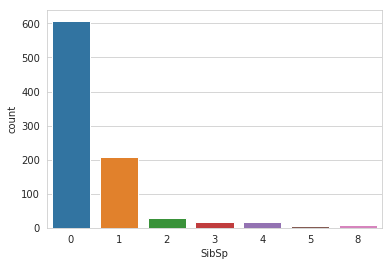

In [44]:
sns.countplot(x='SibSp',data=train)

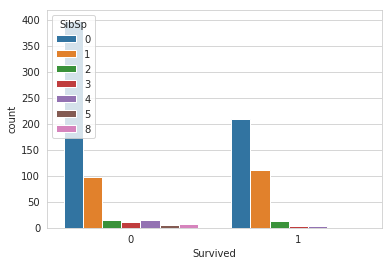

In [45]:
sns.countplot(x='Survived',hue='SibSp',data=train)

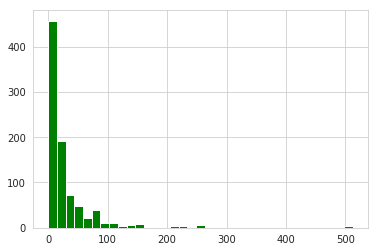

In [46]:
train['Fare'].hist(color='green',bins=35)

# Data Cleaning

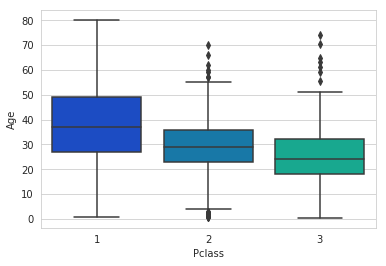

In [47]:
sns.boxplot(x='Pclass', y='Age',data=train,palette='winter')

In [48]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [49]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

# we have also to clean the test data
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1)

In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [51]:
train.drop('Cabin',axis=1,inplace=True)


In [52]:
# drop Cabin from test data also
test.drop('Cabin',axis=1,inplace=True)

In [53]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [54]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [55]:
train.dropna(inplace=True)


In [56]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [57]:
test[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


In [58]:
# set value of 'Fare' at index Location 152 as 50
# we can't delete the row because it we have to submit my prediction values and that should be equal to rows that is being given
test.set_value(152,'Fare',50)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,S


In [59]:
train.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [60]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [62]:
sex = pd.get_dummies(train['Sex'],drop_first=True) # getting dummy of 'Sex' column
embark = pd.get_dummies(train['Embarked'],drop_first=True) # getting dummy of 'Embarked'

In [63]:
# for test data
sex_test = pd.get_dummies(test['Sex'],drop_first=True) # getting dummy of 'Sex' column
embark_test = pd.get_dummies(test['Embarked'],drop_first=True) # getting dummy of 'Embarked'

In [64]:
# drop columns: 'Sex', 'Embarked', 'Name','Ticket','PassengerId'
train.drop(['Sex','Embarked','Name','Ticket','PassengerId'],axis=1,inplace=True)

# for test
test.drop(['Sex','Embarked','Name','Ticket','PassengerId'],axis=1,inplace=True)


In [65]:
# for train
train = pd.concat([train,sex,embark],axis=1)
# for test
test = pd.concat([test,sex_test,embark_test],axis=1)

In [66]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [67]:
# let's also see test data header part
test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


## Create a Validation dataset

In [68]:
predictors = train.drop(['Survived'],axis=1)

In [69]:
predictors.head() # Now It has no label, It is pure training data without labels

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [70]:
target = train['Survived']

In [71]:
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [72]:
# Create a Validation dataset
# .values returns numpy.ndarray
# we are using array instead of dataframe to train model because
# array is faster to compute instead of dataframe

X = predictors.values
Y = target.values
validation_size = 0.20
seed = 42 
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=validation_size,random_state=seed)

In [73]:
type(X)

numpy.ndarray

## Evaluate Algorithms: Baseline

In [74]:
# code source: machinelearningmastery.com
# Spot-check Algorithms
models = []

# In LogisticRegression set: solver='lbfgs',multi_class ='auto', max_iter=10000 to overcome warning
models.append(('LR',LogisticRegression(solver='lbfgs',multi_class='auto',max_iter=10000)))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(gamma='scale')))

# evaluate each model in turn
results = []
names = []

for name, model in models:
    # initializing kfold by n_splits=10(no.of K)
    kfold = KFold(n_splits = 10, random_state=seed)
    
    # cross validation score of given model using cross-validation=kfold
    cv_results = cross_val_score(model,X_train,y_train,cv=kfold, scoring="accuracy")
    
    # appending cross validation result to results list
    results.append(cv_results)
    
    # appending name of algorithm to names list
    names.append(name)
    
    # printing cross_validation_result's mean and standard_deviation
    print(name, cv_results.mean()*100.0, "(",cv_results.std()*100.0,")")

LR 80.0293427230047 ( 3.251835706572597 )
LDA 79.46791862284822 ( 4.5817363000021984 )
KNN 69.197965571205 ( 7.303912431805244 )
CART 79.61463223787167 ( 3.217552338225228 )
NB 78.90062597809077 ( 2.831753685626217 )
SVM 67.65453834115806 ( 5.2834667069524155 )


[Text(0, 0, 'LR'),
 Text(0, 0, 'LDA'),
 Text(0, 0, 'KNN'),
 Text(0, 0, 'CART'),
 Text(0, 0, 'NB'),
 Text(0, 0, 'SVM')]

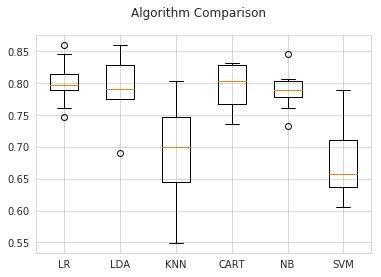

In [75]:
#Let's Compare by plotting it
figure = plt.figure()
figure.suptitle('Algorithm Comparison')
ax = figure.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

# Evaluate Algorithms: Standardize Data

In [76]:
# test options and evaluation matrix
num_folds=10
seed=42
scoring='accuracy'

In [77]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [78]:
# source of code: machinelearningmastery.com
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LogisticRegression(solver='lbfgs',multi_class='auto',max_iter=10000))])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA',LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC(gamma='scale'))])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean()*100, cv_results.std())
    print(msg)

ScaledLR: 80.029343 (0.034873)
ScaledLDA: 79.467919 (0.045817)
ScaledKNN: 83.967136 (0.030930)
ScaledCART: 79.614632 (0.037314)
ScaledNB: 78.900626 (0.028318)
ScaledSVM: 82.280908 (0.029507)


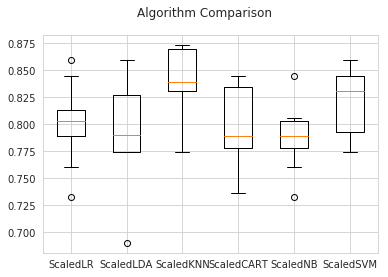

In [79]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Tuning SVM

In [80]:
# Tune scaled SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator= model, param_grid=param_grid, scoring=scoring,cv=kfold)
grid_result = grid.fit(rescaledX,y_train)
print("Best: %f using %s"% (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds= grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r"%(mean,stdev,param))

Best: 0.832630 using {'C': 2.0, 'kernel': 'rbf'}
0.783404 (0.046718) with: {'C': 0.1, 'kernel': 'linear'}
0.751055 (0.033453) with: {'C': 0.1, 'kernel': 'poly'}
0.805907 (0.031559) with: {'C': 0.1, 'kernel': 'rbf'}
0.769339 (0.042263) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.780591 (0.044567) with: {'C': 0.3, 'kernel': 'linear'}
0.776371 (0.036821) with: {'C': 0.3, 'kernel': 'poly'}
0.814346 (0.036077) with: {'C': 0.3, 'kernel': 'rbf'}
0.731364 (0.042801) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.780591 (0.044567) with: {'C': 0.5, 'kernel': 'linear'}
0.807314 (0.026400) with: {'C': 0.5, 'kernel': 'poly'}
0.824191 (0.037331) with: {'C': 0.5, 'kernel': 'rbf'}
0.701828 (0.047293) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.780591 (0.044567) with: {'C': 0.7, 'kernel': 'linear'}
0.824191 (0.030698) with: {'C': 0.7, 'kernel': 'poly'}
0.824191 (0.030948) with: {'C': 0.7, 'kernel': 'rbf'}
0.690577 (0.042244) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.780591 (0.044567) with: {'C': 0.9, 'kernel': 'linear'

We can see the most accurate configuration was SVM with an RBF kernel and a C value of 2.0. The accuracy(83.26) is seemingly better.

In [81]:
# code source: https://www.machinelearningmastery.com by jason Brownlee
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean()*100, cv_results.std()*100)
    print(msg)

AB: 81.993349 (3.278122)
GBM: 82.842332 (2.863711)
RF: 82.003130 (4.368973)
ET: 82.140063 (4.169311)


Here, GBM is not better than SVM

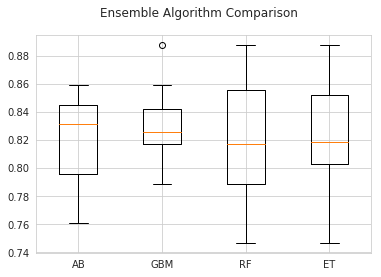

In [82]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Finalize Model


## Making the model using whole training (train) data now

In [83]:
# this accuracy score shows the accuracy of what we have splitted earlier
# this accuracy is not using test dataset, right.

# fitting the StandardScaler() to calculate mean and standard deviation
scaler = StandardScaler().fit(X_train)

# transform X_train according to calculated mean and standard deviation
rescaledX = scaler.transform(X_train)

# making model SVC(Support Vector Classifier)
model = SVC(C=2.0,kernel='rbf')

# fitting the model
model.fit(rescaledX,y_train)



# estimated accuracy on validation dataset
rescaledValidationX = scaler.transform(X_test)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(y_test,predictions)*100)

82.58426966292134


In [84]:
# let's transform the test data
# let's again fit the model using complete train data.

scaler = StandardScaler().fit(X)

rescaledX = scaler.transform(X)

# create model SVC(Support Vector Classifier)
model = SVC(C=2.0,kernel='rbf')

# fit the model
model.fit(rescaledX,Y)

transformed_test = scaler.transform(test)

In [85]:
predictions = model.predict(transformed_test)

In [86]:
predictions

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [87]:
# importing XGBClassifier
from xgboost import XGBClassifier

In [89]:
new_model.fit(X_train,y_train,
             early_stopping_rounds = 5,
             eval_set = [(X_test,y_test)],
             verbose = False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [90]:
xgb_predictions = new_model.predict(X_test)

In [91]:
xgb_predictions

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1])

In [92]:
accuracy_score(xgb_predictions,y_test)

0.8258426966292135

In [93]:
# passing the array(using test.values, .values returns an array) not dataframe
test_predictions = new_model.predict(test.values)

In [94]:
test_predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [95]:
xgb_submission= pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [96]:
xgb_submission.head(15)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [97]:
xgb_submission['Survived'] = test_predictions

In [98]:
xgb_submission.head(15)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [99]:
xgb_submission.to_csv('gender_submission.csv',index=False)

In [105]:
from IPython.display import HTML
import pandas as pd
import numpy as np
import base64

# function that takes in a dataframe and creates a text link to  
# download it (will only work for files < 2MB or so)
def create_download_link(df, title = "Download CSV file", filename = "data.csv"):  
    csv = df.to_csv(index=False)
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)


# create a link to download the dataframe
create_download_link(xgb_submission)

# ↓ ↓ ↓  Yay, download link! ↓ ↓ ↓